# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer


In [ ]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

In [ ]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [3]:
X = pd.read_csv("X_train_preprocessed.csv")
X.head()


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,-1.026722,1.563748,0.818150,0.0,0.0,-1.444425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.185287,1.221386,1.732340,0.0,0.0,1.244471,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.346249,-0.013482,1.275245,0.0,0.0,-0.099977,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.111408,1.209861,-0.096039,0.0,0.0,-0.099977,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.041145,0.891614,-0.553134,0.0,0.0,-0.099977,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
X.shape

(21032, 104)

In [5]:
X_cluster = X.iloc[:, :5]

X_cluster.head()

,0,1,2,3,4
0,-1.026722,1.563748,0.818150,0.0,0.0
1,1.185287,1.221386,1.732340,0.0,0.0
2,0.346249,-0.013482,1.275245,0.0,0.0
3,-0.111408,1.209861,-0.096039,0.0,0.0
4,0.041145,0.891614,-0.553134,0.0,0.0


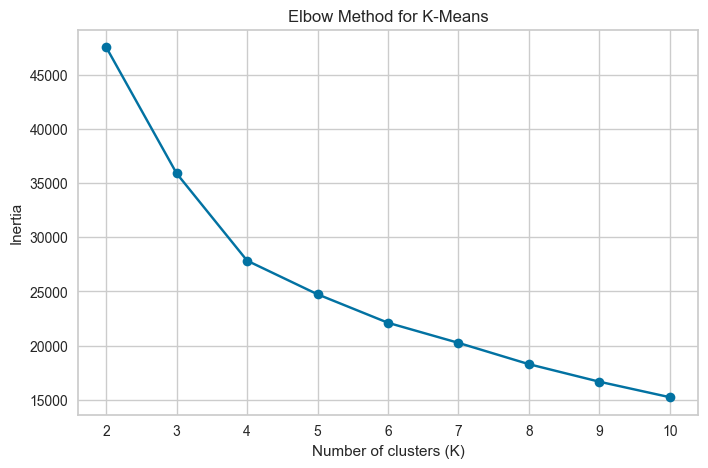

In [10]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


A fost nevoie sa caut alta metoda pentru Elbow Method deoarece am tot incercat dar nu mergea cu Yellowbrick.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

kmeans_labels[:10]


array([1, 0, 0, 1, 1, 0, 2, 0, 0, 0], dtype=int32)

In [12]:
sil_kmeans = silhouette_score(X_cluster, kmeans_labels)
sil_kmeans

0.29180482240204675

Scorul Silhouette este destul de mic, poate insemna o structura slaba a clusterelor.

In [13]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

X_pca[:5]


array([[-0.90254201,  1.68069025],
       [ 1.28473929,  2.04738573],
       [ 0.99178685,  0.70785028],
       [-0.66545401,  0.95079691],
       [-0.69118327,  0.44645926]])

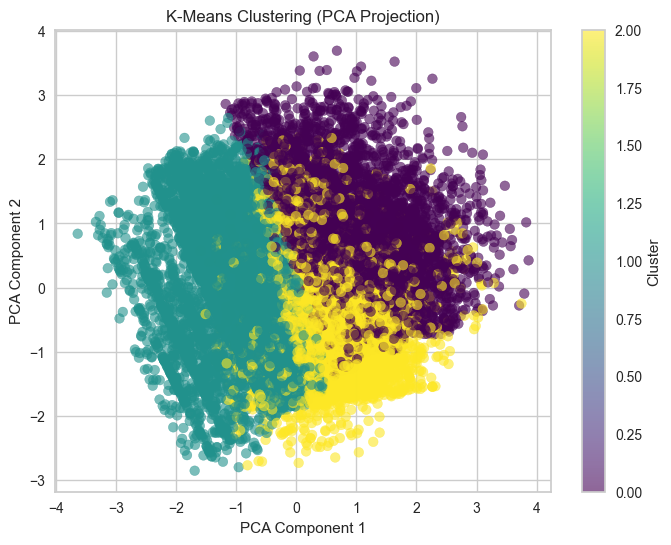

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=kmeans_labels,
    cmap="viridis",
    alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Projection)")
plt.colorbar(label="Cluster")
plt.show()


In [15]:
cluster_analysis = X_cluster.copy()
cluster_analysis["cluster"] = kmeans_labels

cluster_analysis.groupby("cluster").mean()


,0,1,2,3,4
cluster,,,,,
0,0.137976,-0.035432,1.370490,0.0,0.0
1,-0.744628,0.209846,-0.508103,0.0,0.0
2,1.021622,-0.291185,-0.515125,0.0,0.0


Un cluster conține indivizi cu un nivel de educație și câștiguri de capital mai ridicate. Un alt cluster include indivizi cu valori de capital mai scăzute. Diferențele dintre clustere sugerează o segmentare semnificativă a populației.

In [18]:
unique, counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique, counts))

{np.int32(0): np.int64(5711),
 np.int32(1): np.int64(9308),
 np.int32(2): np.int64(6013)}

Summary:

K-Means clustering a produs clustere distincte, cu un scor Silhouette de aproximativ 0,29. Vizualizarea PCA a indicat o separare a grupurilor, K-Means fiind cea mai eficientă abordare de clustering pentru acest set de date. Clusterele arata grupări semnificative bazate pe caracteristicile socio-economice numerice.